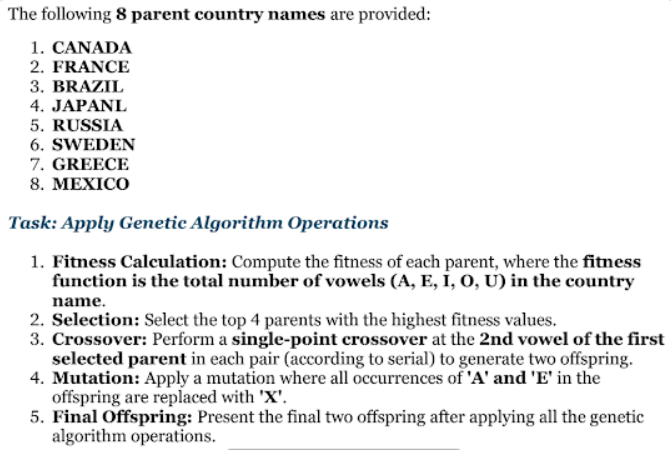

In [10]:
import random

POPULATION = ['CANADA', 'FRANCE', 'BRAZIL', 'JAPANL', 'RUSSIA', 'SWEDEN', 'GREECE', 'MEXICO']

CHROMOSOME_LENGTH = len(POPULATION[0])


def calc_fitness(chromosome):
    
    return sum(1 for c in chromosome.lower() if c in 'aeiou')

def selection(population):
    
    scored = sorted(population, key=calc_fitness, reverse=True)
    return scored[:4]

def find_2nd_vowel_split(s):
    count = 0
    for i,ch in enumerate(s):
        if ch in 'AEIOU':
            count += 1
            if count == 2:
                return i+1
    
    return random.randint(1, len(s)-1)

def single_point_crossover(parent1, parent2):
    
    point = find_2nd_vowel_split(parent1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2


def mutate(chromosome):
    
    return ''.join('X' if ch in 'AE' else ch for ch in chromosome)


def single_generation():
    
    top4 = selection(POPULATION)
    print("Top 4 parents:", top4)

    
    pair1 = (top4[0], top4[1])
    pair2 = (top4[2], top4[3])

    
    child1, child2 = single_point_crossover(*pair1)
    child3, child4 = single_point_crossover(*pair2)

    
    child1 = mutate(child1)
    child2 = mutate(child2)
    child3 = mutate(child3)
    child4 = mutate(child4)

    print("Offspring from pair1:", child1, child2)
    print("Offspring from pair2:", child3, child4)

if __name__ == "__main__":
    single_generation()

    

Top 4 parents: ['CANADA', 'RUSSIA', 'GREECE', 'MEXICO']
Offspring from pair1: CXNXIX RUSSDX
Offspring from pair2: GRXXCO MXXICX


### Extended Version

In [ ]:
import random, string


POPULATION = ['CANADA', 'FRANCE', 'BRAZIL', 'JAPANL', 'RUSSIA', 'SWEDEN', 'GREECE', 'MEXICO']
CHROMOSOME_LENGTH = len(POPULATION[0])
MAX_FITNESS = CHROMOSOME_LENGTH  

CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.3

def calculate_fitness(chromosome):
    
    return sum(1 for c in chromosome if c in 'AEIOU')

def initialize_population():
    
    return POPULATION.copy()

def select_fittest(population):

    scored = sorted(population, key=calculate_fitness, reverse=True)
    return scored[0], scored[1]


def find_2nd_vowel_split(s):
   
    count = 0
    for i, ch in enumerate(s):
        if ch in 'AEIOU':
            count += 1
            if count == 2:
                return i + 1
    return random.randint(1, len(s) - 1)


def crossover(p1, p2):
    
    if random.random() > CROSSOVER_RATE:
        return p1, p2
    pt = find_2nd_vowel_split(p1)
    return p1[:pt] + p2[pt:], p2[:pt] + p1[pt:]


def mutate(chromosome):
    
    result = []
    for ch in chromosome:
        if random.random() < MUTATION_RATE:
            result.append(random.choice(string.ascii_uppercase))
        else:
            result.append(ch)
    return ''.join(result)


def replace_least_fit(population, offspring1, offspring2):
    
    fitness_list = [(i, calculate_fitness(ind)) for i, ind in enumerate(population)]
    fitness_list.sort(key=lambda x: x[1])
    least_fit_index = fitness_list[0][0]
    best_child = offspring1 if calculate_fitness(offspring1) > calculate_fitness(offspring2) else offspring2
    population[least_fit_index] = best_child
    return population

def print_population(population, generation=0):

    print(f"Generation {generation} Population:")
    for i, indiv in enumerate(population, 1):
        print(f"  {i}. {indiv}  Fitness: {calculate_fitness(indiv)}")
    best = max(population, key=calculate_fitness)
    print(f"Best: {best} (Fitness: {calculate_fitness(best)})\n")


def display_result(generation_found, fitness, genes):

    print("GA Completed!")
    print(f"Found solution at generation {generation_found}.")
    print(f"Best Chromosome: {genes}")
    print(f"Fitness: {fitness}\n")



def genetic_algorithm():
    population = initialize_population()
    print_population(population, generation=0)
    generation = 0

    while True:
        fitness_vals = [calculate_fitness(ind) for ind in population]
        max_fit = max(fitness_vals)
        print(f"\nGeneration {generation} | Fittest: {max_fit}")
        if max_fit == MAX_FITNESS:
            break

        p1, p2 = select_fittest(population)
        c1, c2 = crossover(p1, p2)
        c1, c2 = mutate(c1), mutate(c2)
        population = replace_least_fit(population, c1, c2)
        generation += 1
        print_population(population, generation)

    best = max(population, key=calculate_fitness)
    return generation, calculate_fitness(best), best


if __name__ == "__main__":
    gen_found, fit, best_genes = genetic_algorithm()
    display_result(gen_found, fit, best_genes)


Generation 0 Population:
  1. CANADA  Fitness: 3
  2. FRANCE  Fitness: 2
  3. BRAZIL  Fitness: 2
  4. JAPANL  Fitness: 2
  5. RUSSIA  Fitness: 3
  6. SWEDEN  Fitness: 2
  7. GREECE  Fitness: 3
  8. MEXICO  Fitness: 3
Best: CANADA (Fitness: 3)


Generation 0 | Fittest: 3
Generation 1 Population:
  1. CANADA  Fitness: 3
  2. GANAIA  Fitness: 4
  3. BRAZIL  Fitness: 2
  4. JAPANL  Fitness: 2
  5. RUSSIA  Fitness: 3
  6. SWEDEN  Fitness: 2
  7. GREECE  Fitness: 3
  8. MEXICO  Fitness: 3
Best: GANAIA (Fitness: 4)


Generation 1 | Fittest: 4
Generation 2 Population:
  1. CANADA  Fitness: 3
  2. GANAIA  Fitness: 4
  3. CANABA  Fitness: 3
  4. JAPANL  Fitness: 2
  5. RUSSIA  Fitness: 3
  6. SWEDEN  Fitness: 2
  7. GREECE  Fitness: 3
  8. MEXICO  Fitness: 3
Best: GANAIA (Fitness: 4)


Generation 2 | Fittest: 4
Generation 3 Population:
  1. CANADA  Fitness: 3
  2. GANAIA  Fitness: 4
  3. CANABA  Fitness: 3
  4. ABNAIA  Fitness: 4
  5. RUSSIA  Fitness: 3
  6. SWEDEN  Fitness: 2
  7. GREECE  Fitne